### THE SPARKS FOUNDATION INTERNSHIP: Data Science And Business Analytics Intern
### TASK 6:Prediction Using Decision Tree Algorithm
### PROJECT BY OLUWATOMISIN AROKODARE

### Decision Tree
**An hierarchical model known as a decision tree uses a conditional control statements to support decisions and their results, such as efficiency, resource costs, and outcomes of random events.**

### Obective of the project
**1 To Create the Decision Tree classifier and visualize it graphically.** 

**2 To feed any new data to the classifier and ensure that the classifier predict the right class accordingly**

#### The dataset used for this project is  Iris Csv   - (https://bit.ly/3kXTdox)

In [1]:
#Import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")


In [2]:
data=pd.read_csv('iris.csv')

In [3]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
#Checking the shape of the data 
data.shape

(150, 6)

In [5]:
#Checking the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
#checking for null values
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
#checking for duplicate values
data.duplicated().sum()

0

In [8]:
#Checking the data summary statistics
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


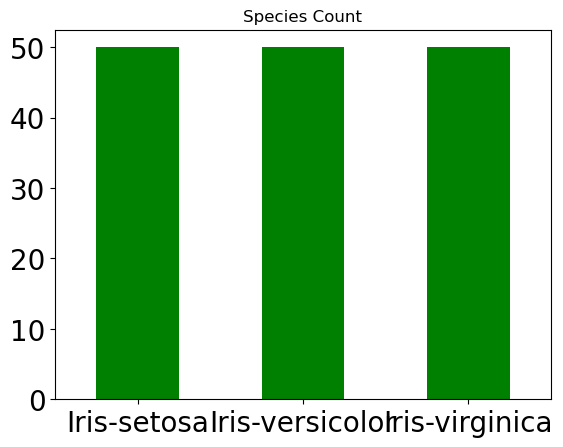

In [9]:
# Value counts of the different species:
data['Species'].value_counts().plot(kind='bar', rot=0, title = 'Species Count', fontsize=20, color='green')
plt.show()

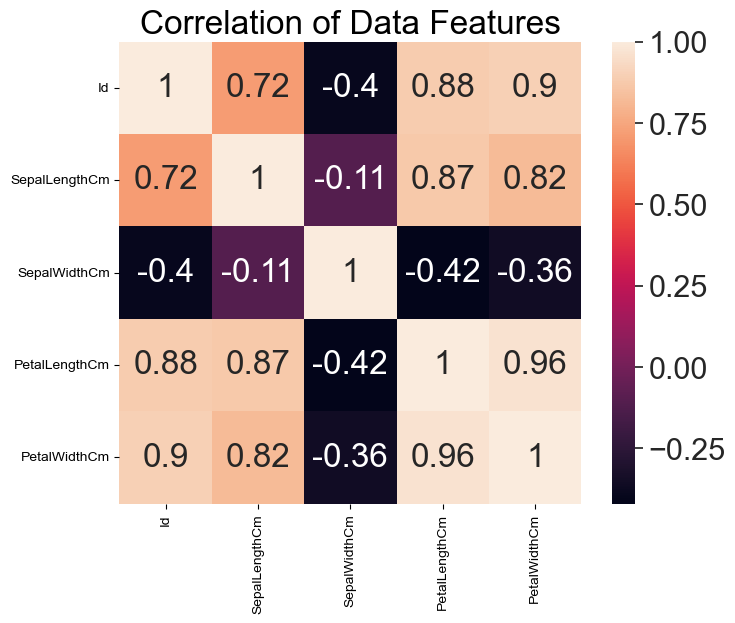

In [10]:
# Correlation between features:
fig, ax = plt.subplots(figsize=(8, 6));
sns.set(font_scale=2);

# Heatmap
sns.heatmap(data.corr(), color= 'green', annot= True, square = True).set(title='Correlation of Data Features')
plt.show()

In [11]:
#Determining the data Features and Target
df_data=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]
x=data[df_data]
y=data.Species

In [12]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [14]:
# Labeling and Encoding the species
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
#### Split the data into train and test using scikit_learn in built function
##The data is splitted into 80% training set and 20% testing set.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [16]:
### Building Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=3)

In [17]:
### Training the decision tree  with the classifier.
clf = clf.fit(x_train,y_train)

In [18]:
### Prediciting the output for test dataset.
y_pred= clf.predict(x_test)

In [19]:
## Evaluating the model
##Checking the accuracy of the cassifier by comparing actual test set values and predicted values.
print("\n Accuracy:",metrics.accuracy_score(y_test, y_pred))


 Accuracy: 1.0


The model predicts 100% accuracy, which is really good for any model.

In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



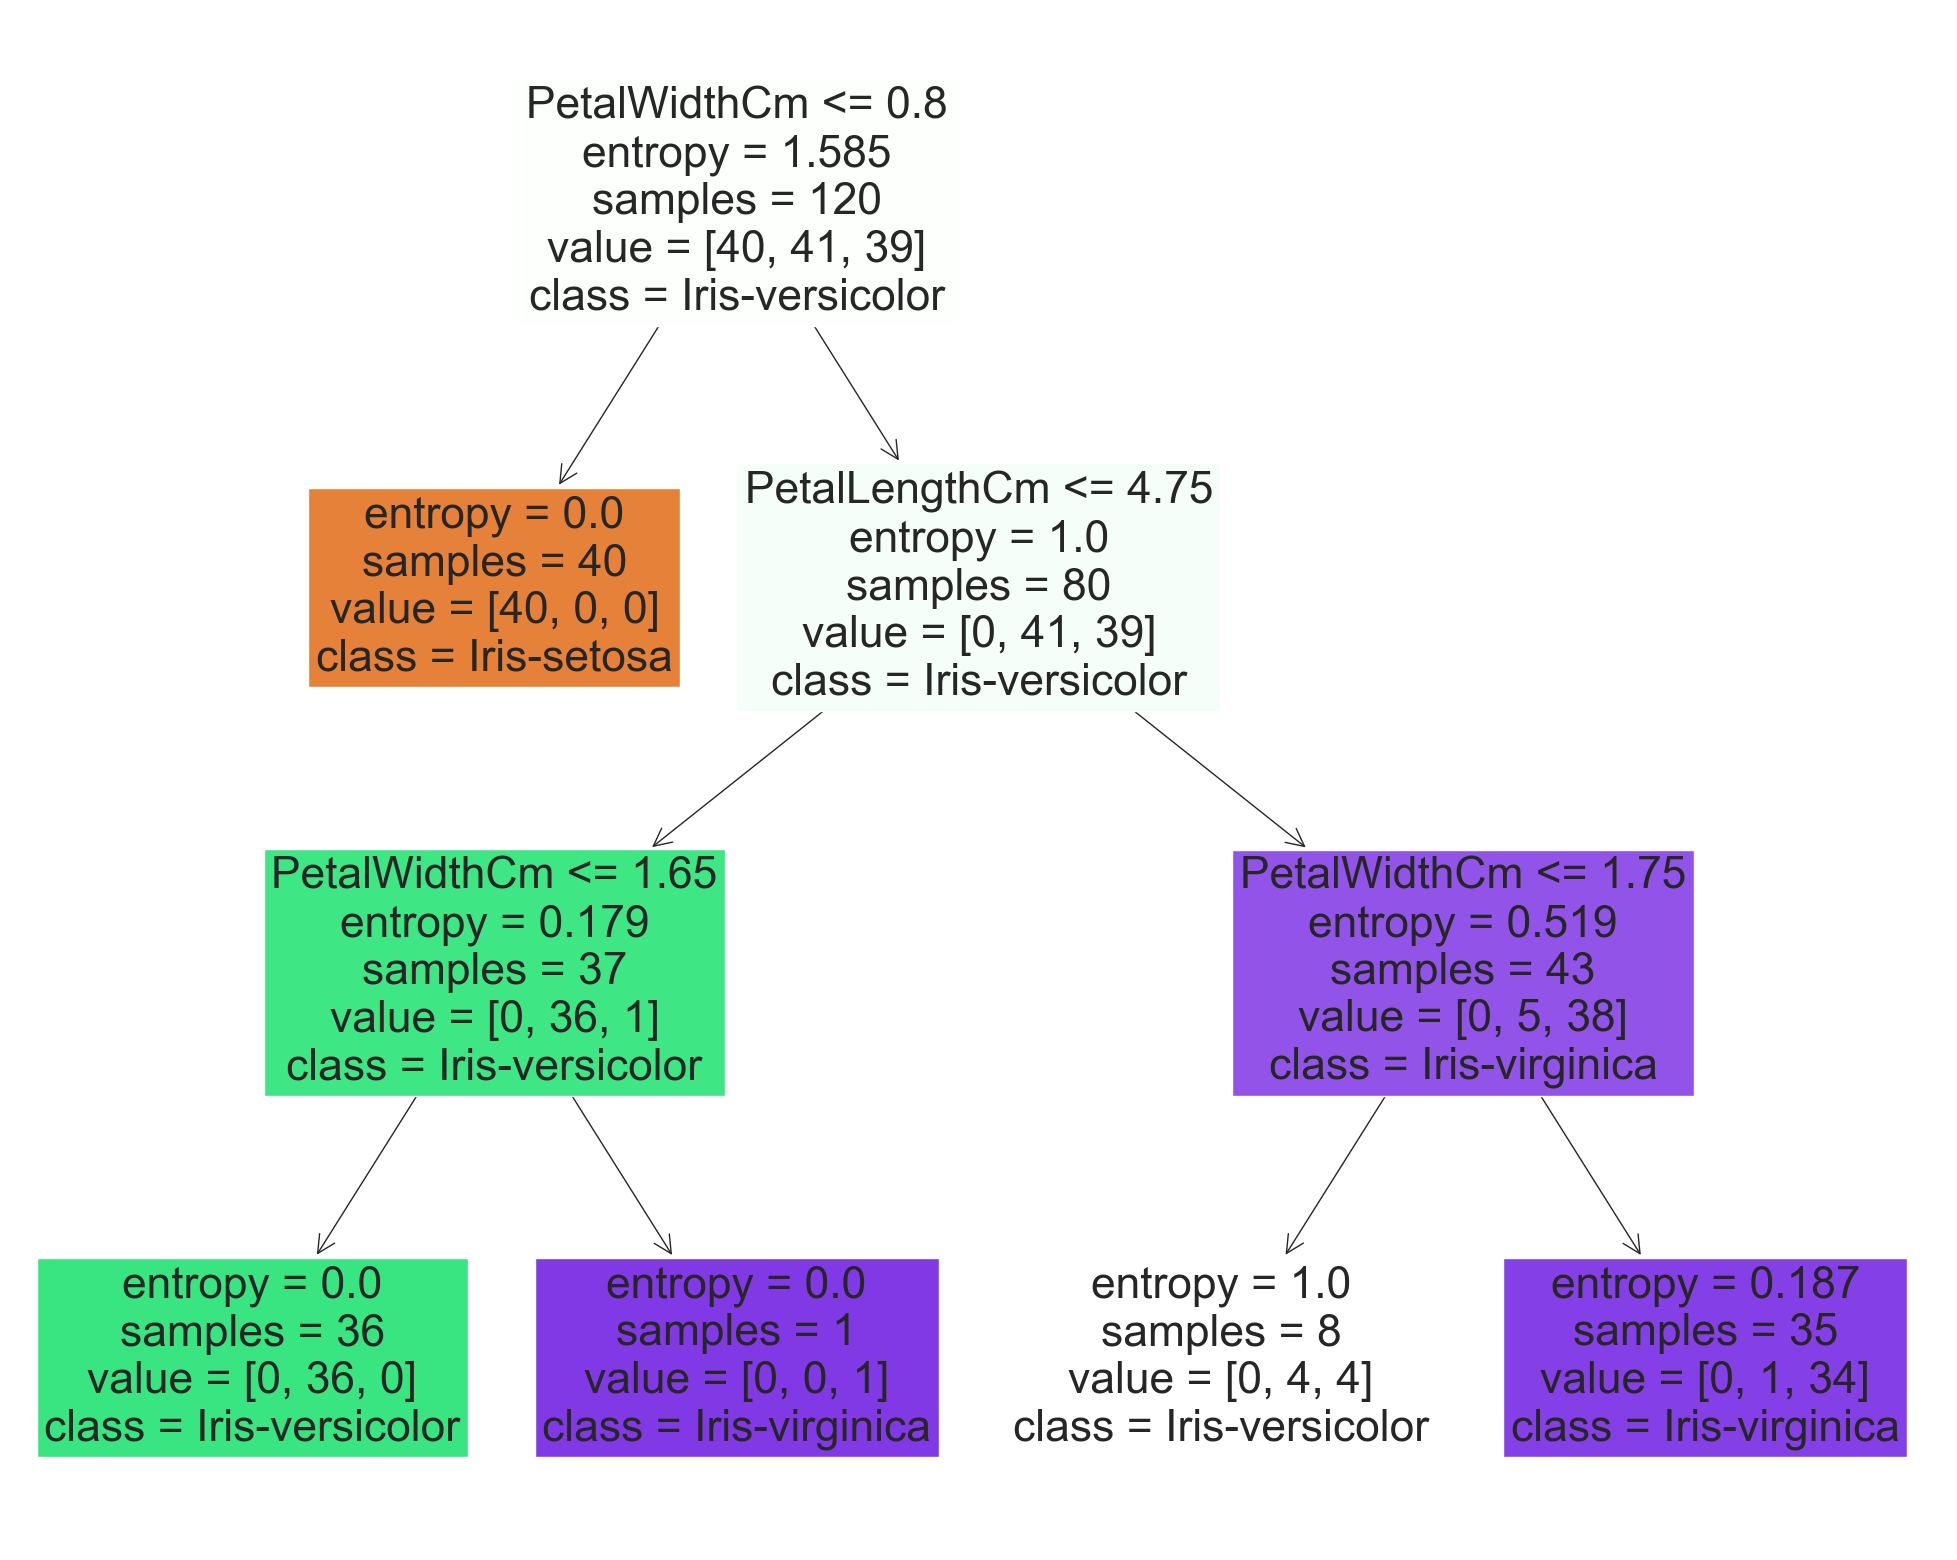

In [21]:
# Visualize the decision tree graphically
fig, ax = plt.subplots(figsize=(25,20))
tree.plot_tree(clf, 
               feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],  
               class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
               filled=True,
               ax=ax)
plt.show()